### Investigate the length of the documents found in the different functions

In [1]:
print("Kernel up and running!")

Kernel up and running!


In [2]:
import sys
print(sys.executable)

!pip3 install ipykernel
!source myEnv/bin/activate

/Users/kailashdejesushornig/Documents/GitHub/RAG_projects/KaisProject/myEnv/bin/python


In [3]:
!pip3 install PyPDF2 matplotlib seaborn
# imports 
import os
import PyPDF2
import matplotlib.pyplot as plt
import seaborn as sns

{'Ekonomi': [5, 5, 2, 7, 2], 'Forskarutbildning': [5, 3, 11, 2, 3, 4, 2, 9, 21, 11, 10, 1, 8, 7, 19], 'Grundutbildning': [3, 10, 5, 4, 5, 45, 8, 6, 2, 26, 3, 6, 4, 9, 2, 3, 26, 4, 5, 4, 11, 7, 4, 3, 5, 26, 2, 3, 21, 2, 1, 5, 4, 2, 8, 25, 26, 5, 6, 49, 6, 8, 27, 46, 3, 11, 8, 34, 6, 7, 8, 6], 'Arbetsmiljö': [9, 2, 2], 'Beslut': [6, 11, 3, 6, 8, 8, 3, 11], 'HR': [2, 4, 2, 2, 3, 3, 3, 6, 3, 2, 6, 6, 2, 5, 13, 2, 4, 2, 6, 6, 6, 4, 7, 5, 3, 4, 1, 6, 6, 2], 'Arbetsordning': [19, 21, 5, 51, 5, 53, 51, 52, 5, 53], 'Forskning': [8, 5, 2, 11, 2, 8, 3, 8, 2, 6, 51, 51, 2, 53, 8, 12, 53, 5, 52, 11, 7, 8]}


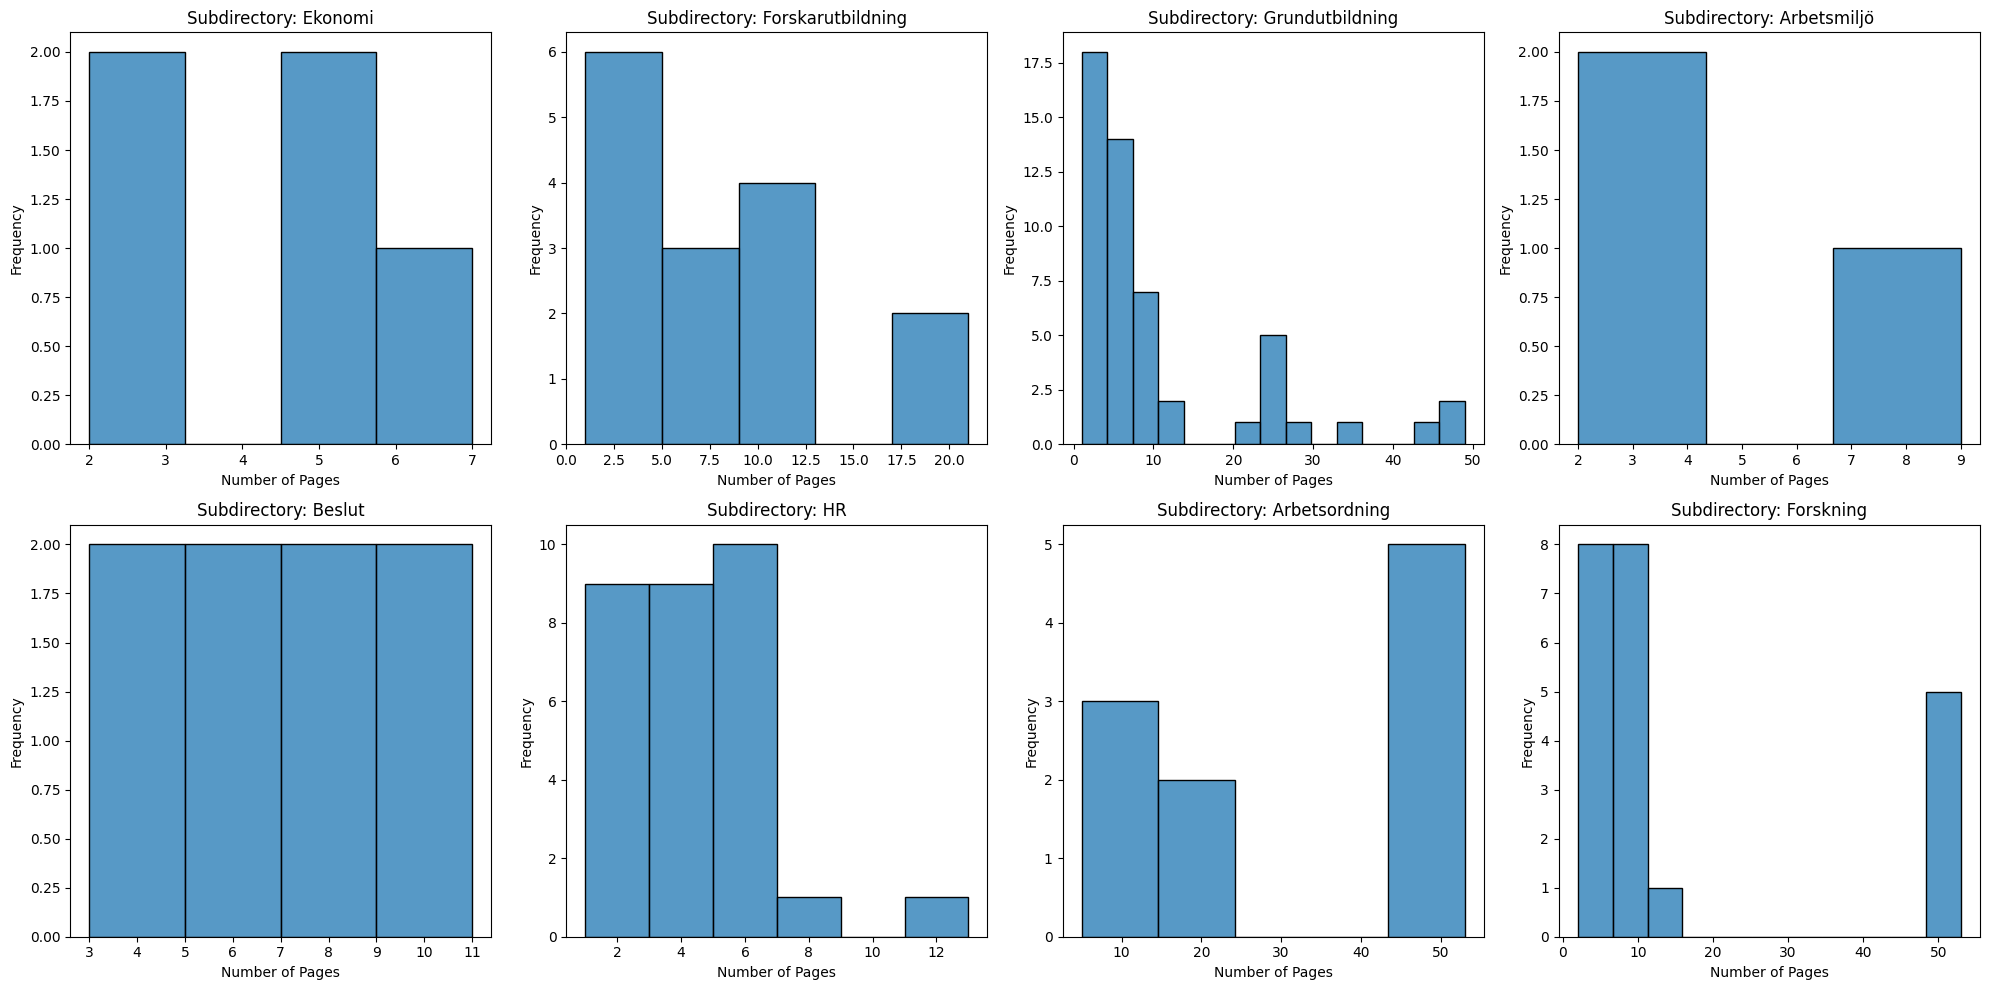

In [14]:
def get_pdf_lengths(directory):
    pdf_lengths = {}
    for root, _, files in os.walk(directory):
        if root == directory:
            continue  # Skip the main directory
        subdirectory = os.path.basename(root)
        lengths = []
        for file in files:
            # print(f"Now working on {file}...")
            if file.endswith('.PDF'):
                path = os.path.join(root, file)
                with open(path, 'rb') as f: 
                    reader = PyPDF2.PdfReader(f)
                    lengths.append(len(reader.pages))
                    # print(f"len is {lengths} long")
        pdf_lengths[subdirectory] = lengths
    return pdf_lengths

def plot_lengths(data, ax, title):
    sns.histplot(data, kde=False, ax=ax)
    ax.set_title(title)
    ax.set_xlabel('Number of Pages')
    ax.set_ylabel('Frequency')

def main():
    directory = '/Users/kailashdejesushornig/Documents/GitHub/RAG_projects/KaisProject/RegulatoryDocs'  # Change this to your directory
    pdf_lengths = get_pdf_lengths(directory)
    print(pdf_lengths)

    num_subdirectories = len(pdf_lengths)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10))  # Adjusting for 8 subplots
    axes = axes.flatten()

    for i, (subdir, lengths) in enumerate(pdf_lengths.items()):
        plot_lengths(lengths, axes[i], f'Subdirectory: {subdir}')

    plt.tight_layout()
    plt.show()

if __name__ == "__main__":
    main()
